# Question 4A
Take grayscale image of size $512\times512$, add some Gaussian noise and Apply 4-th order Butterworth and Gaussian low pass filter to analyze their performance quantitatively in frequency domain.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [11]:
def add_gaussian_noise(image, mean=0, std=1):
    noise = np.random.normal(mean, std, image.shape)
    noisy_image = image+noise
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.uint8)

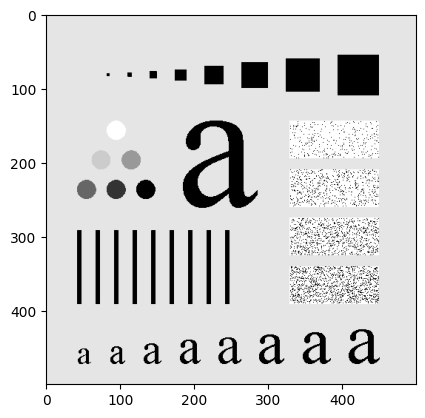

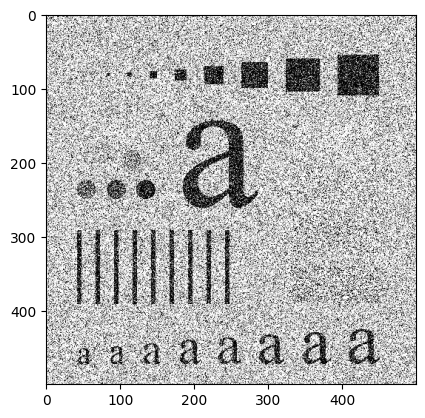

In [51]:
# opening image
original_image = plt.imread('pattern.tif').copy()
gaussian_noisy_image = add_gaussian_noise(original_image, mean=0, std=125)
plt.imshow(original_image, cmap='gray')
plt.show()

plt.imshow(gaussian_noisy_image, cmap='gray')
plt.show()

In [24]:
def getHistrogram(image):
    # process image intensity
    max_intensity = np.max(image)
    min_intensity = np.min(image)
    if min_intensity>=0 and max_intensity<=1:
        image = image*255
    rounded_image = np.round(image)
    integer_image = rounded_image.astype(np.uint8)
    
    # make histrogram
    histrogram = np.zeros(256, dtype='uint8')
    height, width = integer_image.shape
    
    for x in range(height):
        for y in range(width):
            histrogram[integer_image[x, y]] += 1

    return histrogram, np.arange(256)

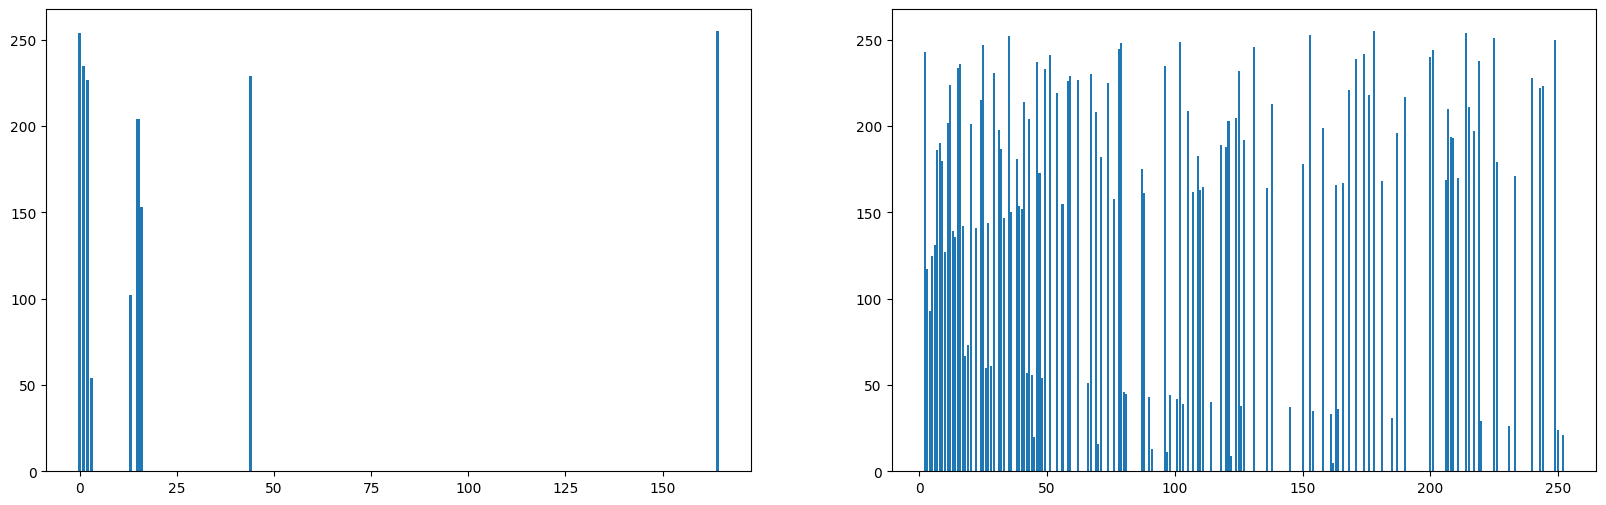

In [25]:
original_x, original_y = getHistrogram(original_image)
noisy_x, noisy_y = getHistrogram(gaussian_noisy_image)
plt.figure(figsize=(20, 6))
plt.subplot(121)
plt.bar(original_x, original_y)
plt.subplot(122)
plt.bar(noisy_x, noisy_y)
plt.show()

### Butterworth Low-pass Filter
If $D_0$ is the *cutoff frequency*, $n$ is the order, $H(u,v)$ is the output pixel of frequency domain image, $D(u,v)$ is the distance betwwen a point $(u,v)$ in the frequency domain and the center of the frequency rectangle, $P$ is the height and $Q$ is the width, then
$$H(u,v) = \frac{1}{1+[D(u,v)/D_0]^{2n}}$$

Where,  
$$D(u,v) = [(u-P/2)^2 + (v-Q/2)^2]^{\frac{1}{2}}$$

In [36]:
def batterworth_low_pass_filter(image, order, cut_off_frequency):
    height, width = image.shape
    my_filter  = np.zeros(image.shape, dtype=np.float32)

    frequncy_domain_image = np.fft.fft2(image)
    frequncy_domain_image = np.fft.fftshift(frequncy_domain_image)
    n = order
    d0 = cut_off_frequency


    for i in range(height):
        for j in range(width):
            d = np.sqrt((i-height/2)**2 + (j-width/2)**2)
            my_filter[i, j] = 1/(1+(d/d0)**(2*n))
    
    filteredImage = frequncy_domain_image * my_filter
    filteredImage = np.fft.fftshift(filteredImage)
    filteredImage = np.abs(np.fft.ifft2(filteredImage))
    
    return filteredImage

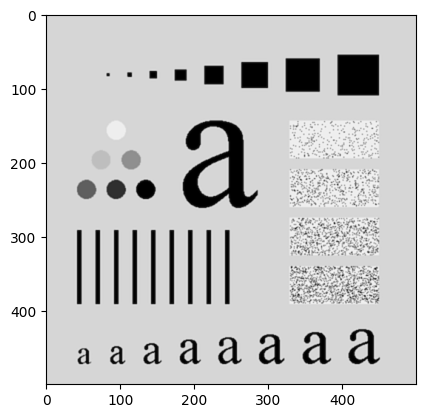

In [55]:
butterFilteredImage = batterworth_low_pass_filter(original_image, 2, 160)
plt.imshow(butterFilteredImage, cmap="gray")

### Gaussian Low Pass Filter
If $D_0$ is the *cutoff frequency*, $H(u,v)$ is the output pixel of frequency domain image, $D(u,v)$ is the distance betwwen a point $(u,v)$ in the frequency domain and the center of the frequency rectangle, $P$ is the height and $Q$ is the width, then
$$H(u,v) = e^{-D^2(u,v)/2{D_0}^2}$$

Where,  
$$D(u,v) = \sqrt{[(u-P/2)^2 + (v-Q/2)^2]}$$

In [56]:
def gaussion_low_pass_filter(image, cutoff):
    height, width = image.shape
    my_filter = np.zeros(image.shape, dtype=np.float32)

    frequency_domain_image = np.fft.fft2(image)
    frequency_domain_image = np.fft.fftshift(frequency_domain_image)

    d0 = cutoff

    for i in range(height):
        for j in range(width):
            d = np.sqrt((i-height/2)**2 + (j-width/2)**2)
            my_filter[i, j] = np.exp(-(d**2)/(2*d0**2))

    filteredImage = frequency_domain_image * my_filter
    
    filteredImage = np.fft.fftshift(filteredImage)
    filteredImage = np.abs(np.fft.ifft2(filteredImage))

    return filteredImage

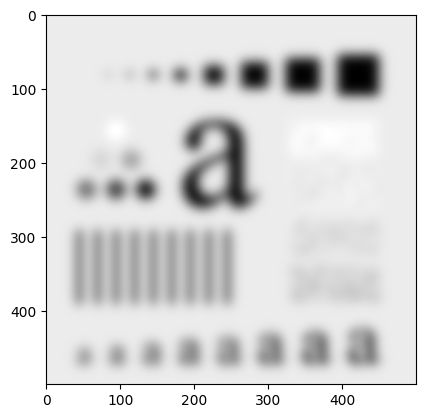

In [58]:
gaussianFilteredImage = gaussion_low_pass_filter(original_image, 10)
plt.imshow(gaussianFilteredImage, cmap="gray")